<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Guided Practice: Explore Python Data Visualization

---

In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

## Learning Objectives

- **Practice** using different types of plots.
- **Use** Pandas methods for plotting.
- **Create** line plots, bar plots, histograms, and box plots.
- **Know** when to use Seaborn or advanced Matplotlib

## Lesson Guide

- [Line Plots](#line-plots)
- [Bar Plots](#bar-plots)
- [Histograms](#histograms)
    - [Grouped Histograms](#grouped-histograms)
    
    
- [Box Plots](#box-plots)
    - [Grouped Box Plots](#grouped-box-plots)
    
- [Scatter Plots](#scatter-plots)
- [Using Seaborn](#using-seaborn)
- [OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)](#matplotlib)
- [OPTIONAL: Additional Topics](#additional-topics)

- [Summary](#summary)

### Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. It is important to know that Pandas uses Matplotlib behind the scenes to make plots. So, you will notice that Pandas plotting methods often use similar parameter names as Matplotlib methods. Further, you can use Matplotlib functions in combination with Pandas methods to alter the plots after drawing them. For example, you can use Matplotlib's `xlabel` and `title` functions to label the plot's x-axis and title, respectively, after it is drawn.

As we explore different types of plots, notice:

1. Different types of plots are drawn very similarly -- they even tend to share parameter names.
2. In Pandas, calling `plot()` on a `DataFrame` is different than calling it on a `Series`. Although the methods are both named `plot`, they may take different parameters.

Toward the end of the lab, we will show some motivational plots using Seaborn, a popular statistics plotting library, as well as go more in-depth about how Matplotlib works.


### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [1]:
from IPython.display import HTML
from IPython.display import Image
Image("./assets/images/chart_suggestions.png")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples.

In [2]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [3]:
df.head()

,col1,col2,col3,col4
a,-0.550639,-0.975732,0.512007,0.225083
b,0.036369,-0.263238,0.105727,1.138003
c,-0.841722,1.947021,-0.327392,-1.332709
d,-0.624031,-0.626173,-2.571988,1.167534
e,0.938213,0.365475,0.129938,0.274003


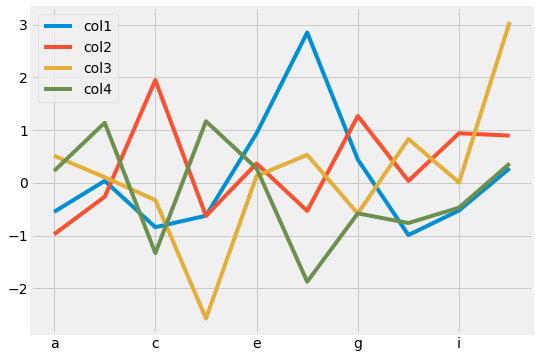

In [4]:
# Calling plot() on DataFrame plots all variables in same figure
df.plot();

### Choosing the right type of visualization

The choice of visualization should depend what you are trying to show. Here is a helpful flowchart that you can use to determine the best type of visualizations:

![Chart Suggestions](./assets/images/chart_suggestions.png)


### Load in data sets for visualization examples.



###  We'll be using three datasets: 

* `boston_housing_data.csv`, an 'iconic' dataset of house prices in Boston. The data dictionary which explains variable names, can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

* `drinks.csv`, a dataset compiled by FiveThirtyEight for this article on alcohol consumption: https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/

* `ufo.csv`, a dataset compiled by the National UFO Reporting Centre on UFO sightings: https://www.kaggle.com/NUFORC/ufo-sightings

In [5]:
# Read in the Boston housing data
housing_csv = 'data/boston.csv'
housing = pd.read_csv(housing_csv)

# Read in the drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data (categorical variables)
ufo = pd.read_csv('data/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time
---

- **Objective:** **Use** Pandas methods for plotting.
- **Objective:** **Create** line plots, bar plots, histograms, and box plots.

In [6]:
# Date, Location and Shape of UFO sighting
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [7]:
# Count number of UFO reports each year (and sort by year)
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, Length: 82, dtype: int64

 Use code from the cell above together with ``.plot()`` to generate a line plot of sightings over time. The result should look like this:

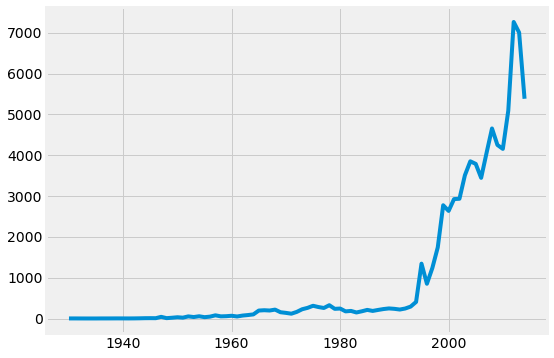

In [8]:
ufo.Year.value_counts().sort_index().plot();


### Bar charts: showing counts for categorical variables

In [9]:
# Beer/Spirit/Wine/Pure alcohol servings per country
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [10]:
drinks['continent'].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

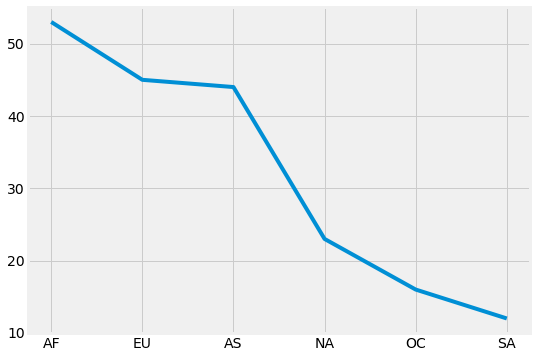

In [11]:
# COMMON MISTAKE: Don't use a line plot when the x-axis cannot be ordered sensically!
# Always think about what you're plotting and if it makes sense.

drinks.continent.value_counts().plot(); 

**Important:** A line plot is the wrong type of plot for this data. Any set of countries can be rearranged misleadingly to illustrate a negative trend, as we did here. Due to this, it would be more appropriate to represent this data using a bar plot, which does not imply a trend based on order.

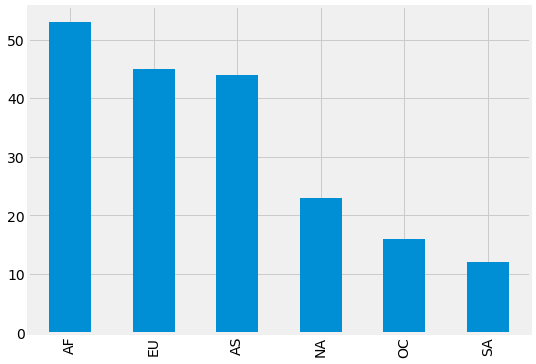

In [12]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
_ = drinks.continent.value_counts().plot(kind="bar")

In [13]:
# This command opens documentation on plot() function
pd.Series.plot?
#pd.DataFrame.plot?

### Line Plot With a `DataFrame`

In [14]:
df.head()

,col1,col2,col3,col4
a,-0.550639,-0.975732,0.512007,0.225083
b,0.036369,-0.263238,0.105727,1.138003
c,-0.841722,1.947021,-0.327392,-1.332709
d,-0.624031,-0.626173,-2.571988,1.167534
e,0.938213,0.365475,0.129938,0.274003


### How to change the size of a plot

Use the figsize parameter to change the size of the plot to 15 "inches" (width) by 8 "inches" (height). The result should look like this:

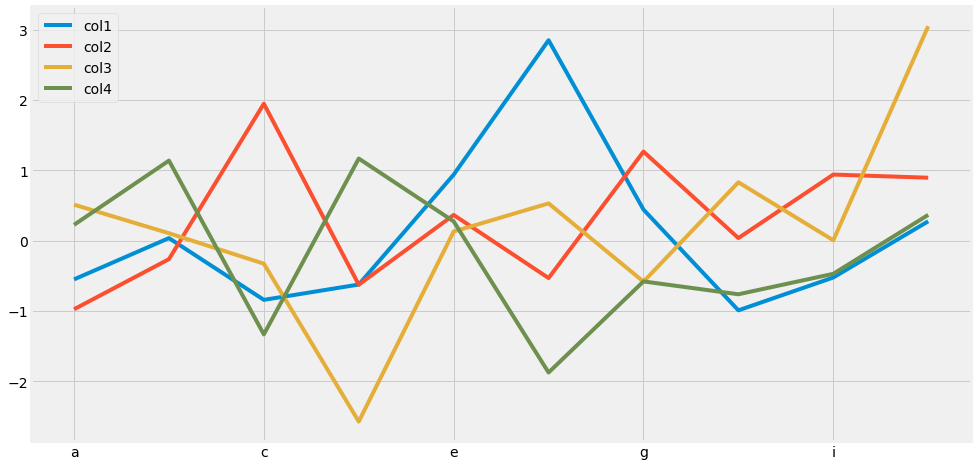

In [15]:
df.plot(figsize=(15,8));

### How to change the color of a plot

Plot `col1` of `df` against its index. Use the ``color`` parameter to change the colour of the line to `crimson`. The result should look like this:

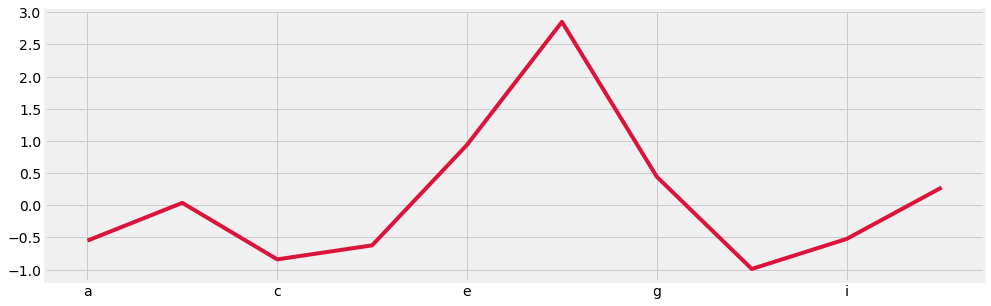

In [16]:
df.col1.plot(color="crimson", figsize=(15,5));

### How to change the style of individual lines

Plot both `col1` and `col4` of `df` against the index on the same axes. Use the `style` parameter to change the appearance of both plots to match the example below. Hint: `:` denotes dotted line, `v` denotes triangle marker, `r` denotes red and `b` blue. The `figsize` should be 15 by 7.

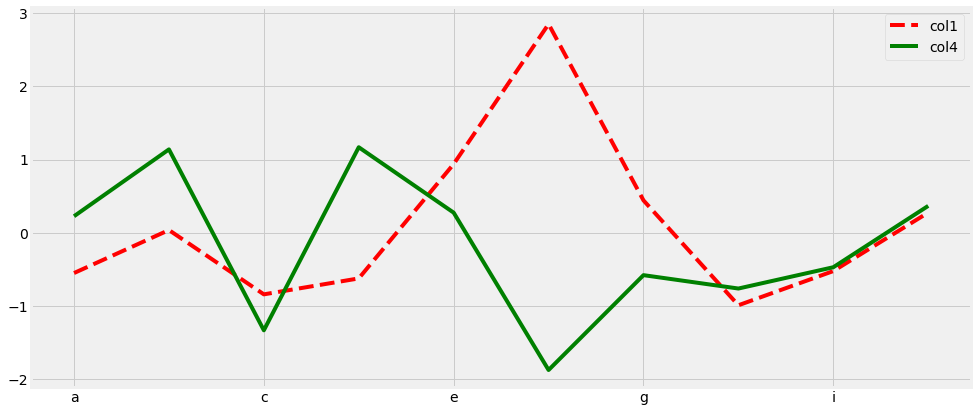

In [17]:
df[["col1","col4"]].plot(style={"col1" : "r--", "col4" : "g"}, figsize=(15,7));

### Challenge: Create a line plot of `ZN` and `INDUS` in the housing data. 
- Check the description of the data here:
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

In [18]:
# Statistics on Boston housing data - 
# ZN is proportion of residential land zoned for lots > 25,000 square foot
# INDUS is proportion of non-retail business land per town
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


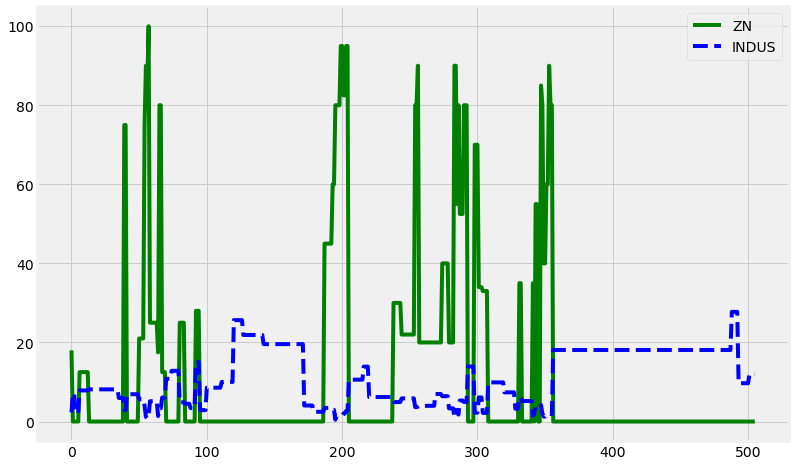

In [19]:
housing[["ZN","INDUS"]].plot(figsize=(12,8), style=["g","b--"]);

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

Get the value counts for `drinks` in each continent, and plot as a bar chart.

In [20]:
drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

Calculate the mean alcohol consumption per continent using `groupby` and `mean`.

In [22]:
# continent column becomes the index which is x-axis when plotting
drinks.groupby("continent").mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


Visualise this breakdown by `continent` using a bar chart.

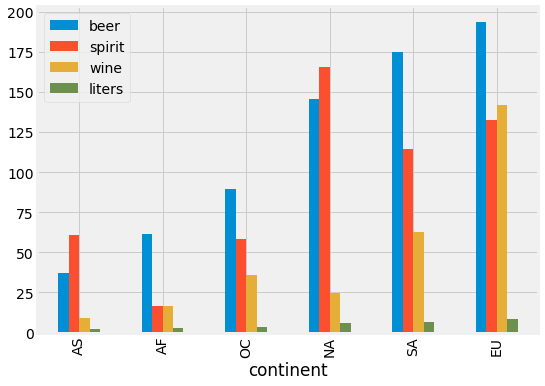

In [23]:
drinks.groupby("continent").mean().sort_values("beer").plot(kind="bar");

Drop the `liters` column from the dataframe and re-generate the plot, still sorted by beer values. Use stacking to make figure neater.

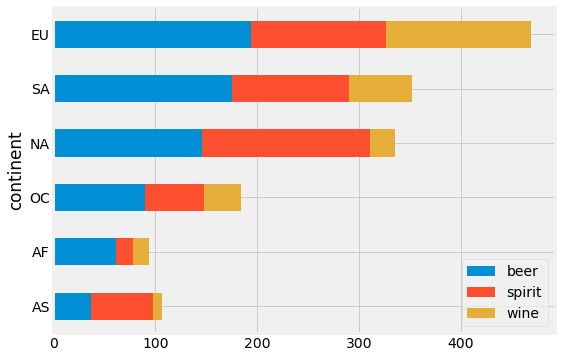

In [24]:
drinks.groupby("continent").mean().drop("liters", axis=1).sort_values("beer").plot(kind="barh", stacked=True);


### Using a `DataFrame` and Matplotlib commands, we can get fancy with our random data.

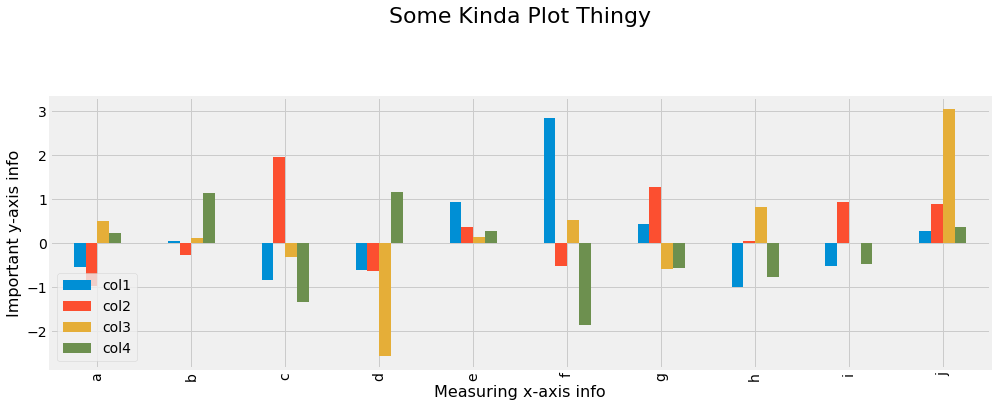

In [25]:
ax = df.plot(kind='bar', figsize=(15, 5));

# Set the title (y parameter aligns title vertically; x parameter aligns title horizontally)
ax.set_title('Some Kinda Plot Thingy', fontsize=22, y=1.25);

# Move the legend using loc parameter
ax.legend(loc=3);

# x-axis labels and their size
ax.set_ylabel('Important y-axis info', fontsize=16);

# y-axis labels and their size
ax.set_xlabel('Measuring x-axis info', fontsize=16);

### Challenge: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

In [26]:
# See above

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

In [27]:
# See below

### Stacked works on horizontal bar charts.

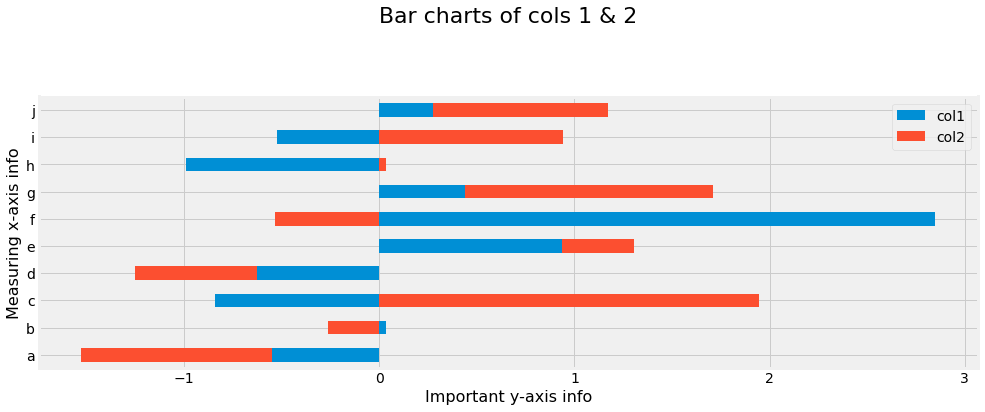

In [29]:
ax = df[['col1', 'col2']].plot(kind='barh', stacked=True, figsize=(15, 5));

# Set the title (y parameter aligns title vertically; x parameter aligns title horizontally)
ax.set_title('Bar charts of cols 1 & 2', fontsize=22, y=1.25);

# Move the legend using loc parameter
ax.legend(loc=1);

# y-axis labels and their size
ax.set_ylabel('Measuring x-axis info', fontsize=16);

# x-axis labels and their size
ax.set_xlabel('Important y-axis info', fontsize=16);

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [30]:
# Sort the beer column and mentally split it into three bins using range (0-376)
drinks.beer.sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

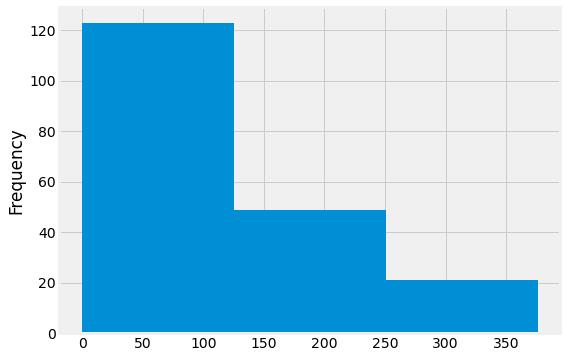

In [31]:
# How many of the points above are in the groups (1-125), (125-250), and (250-376)?
drinks.beer.plot(kind='hist', bins=3);

Alter the histogram so there are 20 bins in the data. Add labels to the axes 

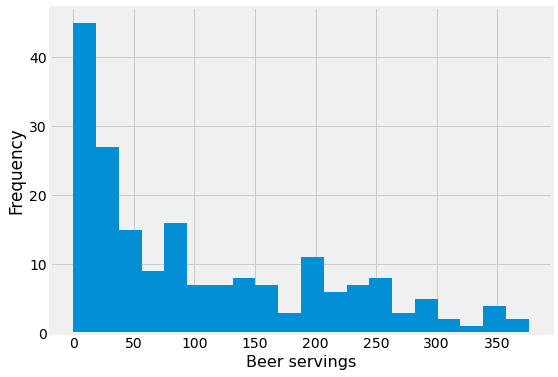

In [32]:
ax = drinks.beer.plot(kind='hist', bins=20)
ax.set_xlabel('Beer servings', fontsize=16);

Use the density option to create a smoothed version of the histogram. Limit the range of the x axis from 0-500 using the xlim option.

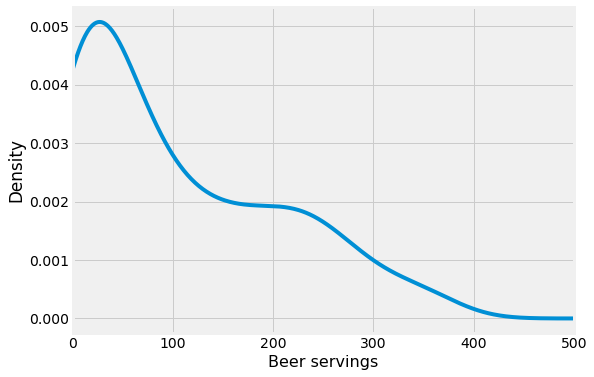

In [34]:
ax = drinks.beer.plot(kind='density', xlim=(0,500))
ax.set_xlabel('Beer servings', fontsize=16);

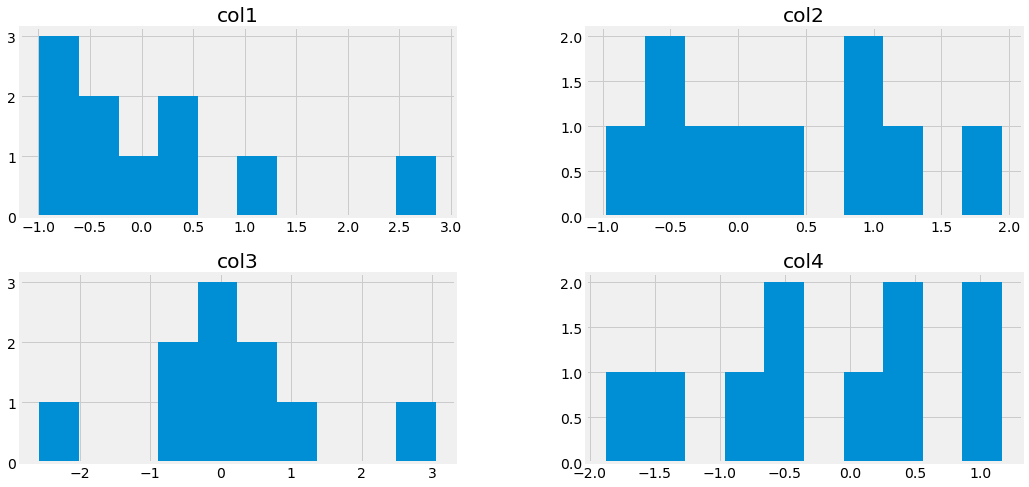

In [35]:
# Create histogram for each column in the random data
df.hist(figsize=(16, 8));

### Single Histogram
#### We can generate a histogram of a normal distribution with 5000 samples as shown below.

In [36]:
norm = np.random.standard_normal(5000)

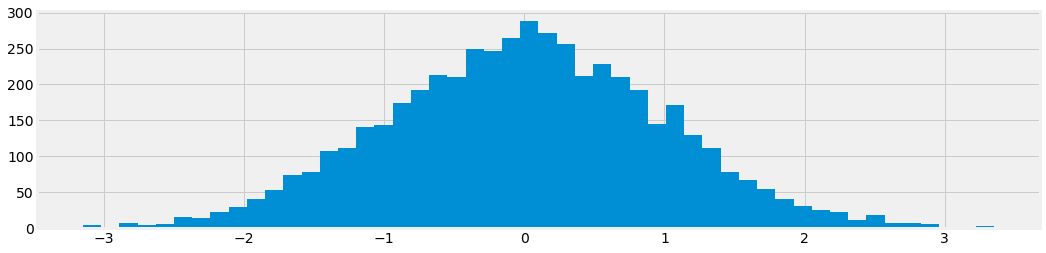

In [37]:
pd.Series(norm).hist(figsize=(16,4), bins=50);

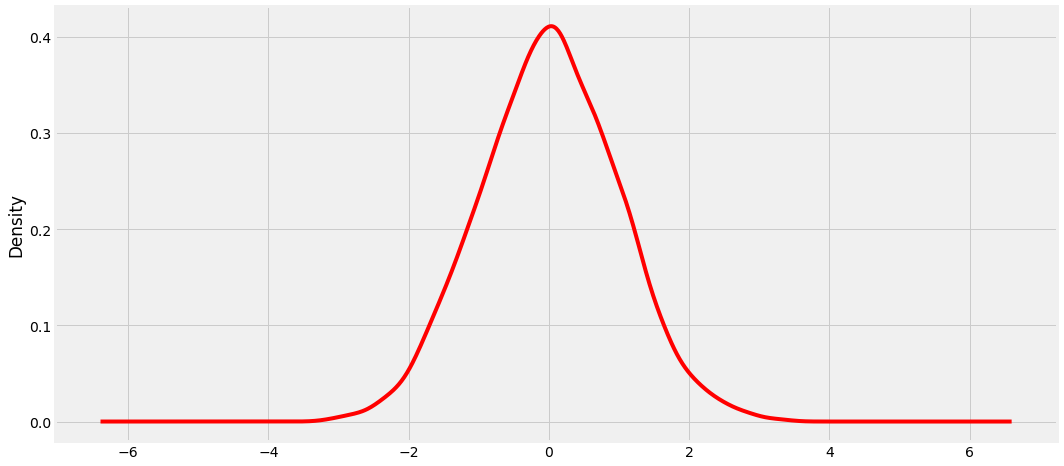

In [38]:
pd.Series(norm).plot(kind="density", figsize=(16,8), color=("red"));

### Another bins example: Sometimes the binning makes the data look different or misleading.

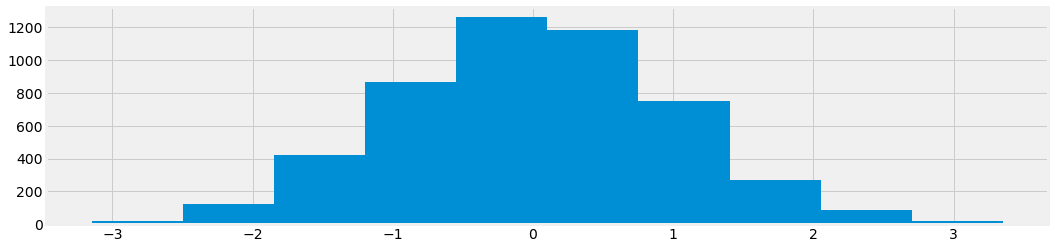

In [39]:
pd.Series(norm).hist(figsize=(16,4), bins=10);

### Challenge: Create a histogram with pandas for using `MEDV` in the housing data (Median House Value).
- Set the bins to 20.

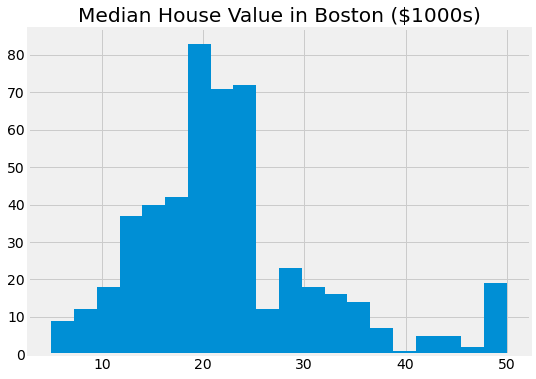

In [40]:
ax = housing["MEDV"].hist(bins=20)
ax.set_title("Median House Value in Boston ($1000s)");

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

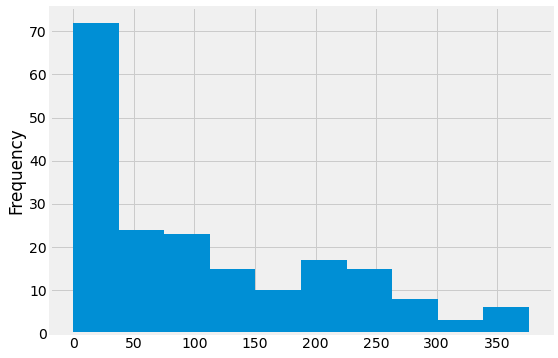

In [41]:
# Reminder: Overall histogram of beer servings
drinks.beer.plot(kind='hist');

 Histogram of beer servings grouped by continent -- how might these graphs be misleading?
 
 The x-axis for the subplots are not all the same - make sure to read the values correctly. The same applies to the y-axis. Basically, do not use this format when comparing distributions.

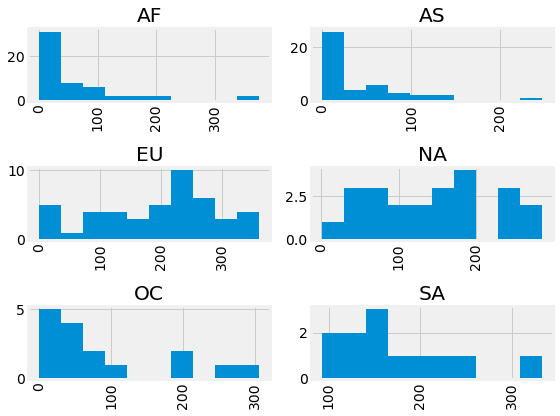

In [42]:
drinks.hist(column='beer', by='continent')
plt.tight_layout();

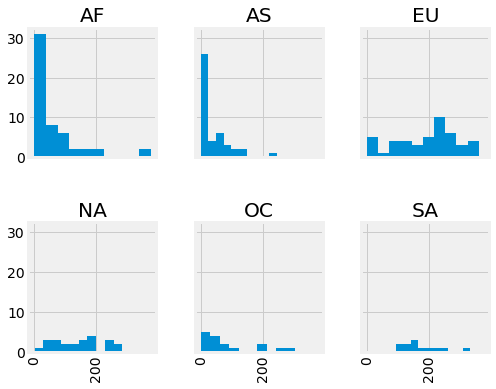

In [43]:
# Share the x- and y-axes to homogenise all subplots to share the same axes - better for comparison
drinks.hist(column='beer', by='continent', sharex=True, sharey=True, layout=(2, 3));

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---
https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

We can use boxplots to quickly summarize distributions.

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(It's more useful than mean and standard deviation for describing skewed distributions.)

**Interquartile Range (IQR)** = Q3 - Q1
https://en.wikipedia.org/wiki/Interquartile_range

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

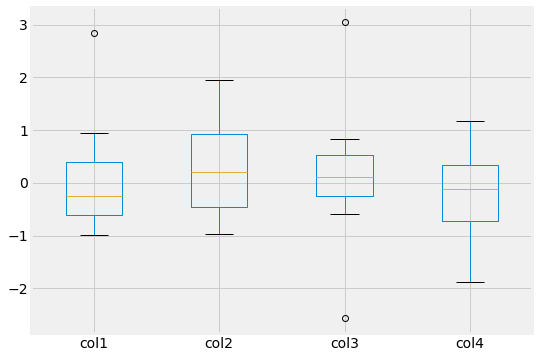

In [44]:
# Lower quartile, Middle quartile, Upper quartile and outliers (small circles)
# Red line indicates mean
df.boxplot();

### Let's see how box plots are generated so we can best interpret them.

In [45]:
# Show "five-point summary" for spirit servings
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

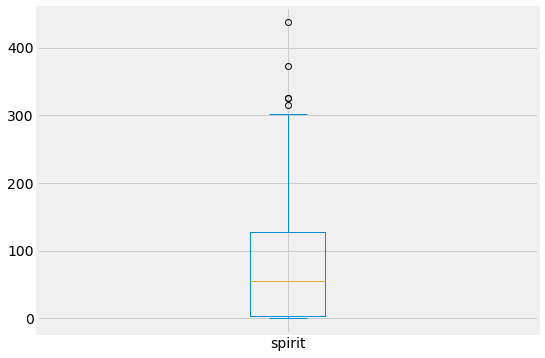

In [46]:
# Compare with box plot
drinks.spirit.plot(kind='box');

 Create a box plot for beer, spirits and wine on a single set of axes.

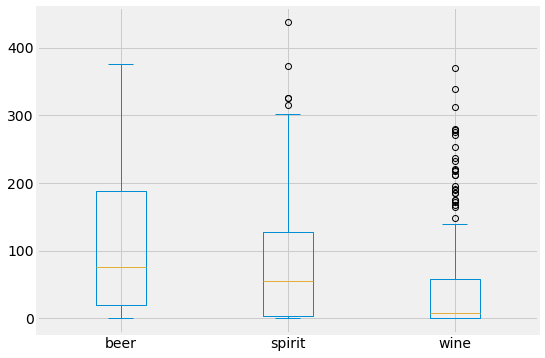

In [47]:
drinks[['beer', 'spirit', 'wine']].plot(kind='box');

### How to use a box plot to preview the distributions in the Boston housing data

Generate a boxplot to view distributions of all variables in the housing dataset.

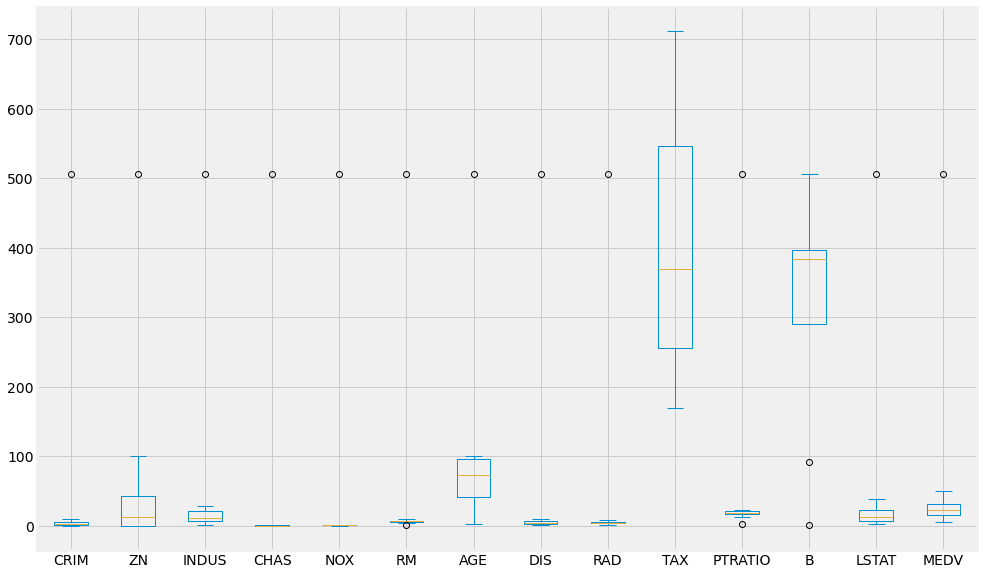

In [48]:
housing.describe().plot(kind="box", figsize=(15,10));

<a id="grouped-box-plots"></a>
### Grouped box plots: Show one box plot for each group.

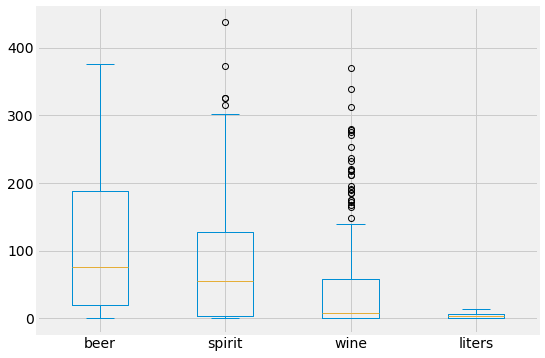

In [49]:
# Box plot of each drinks serving
drinks.plot(kind='box');

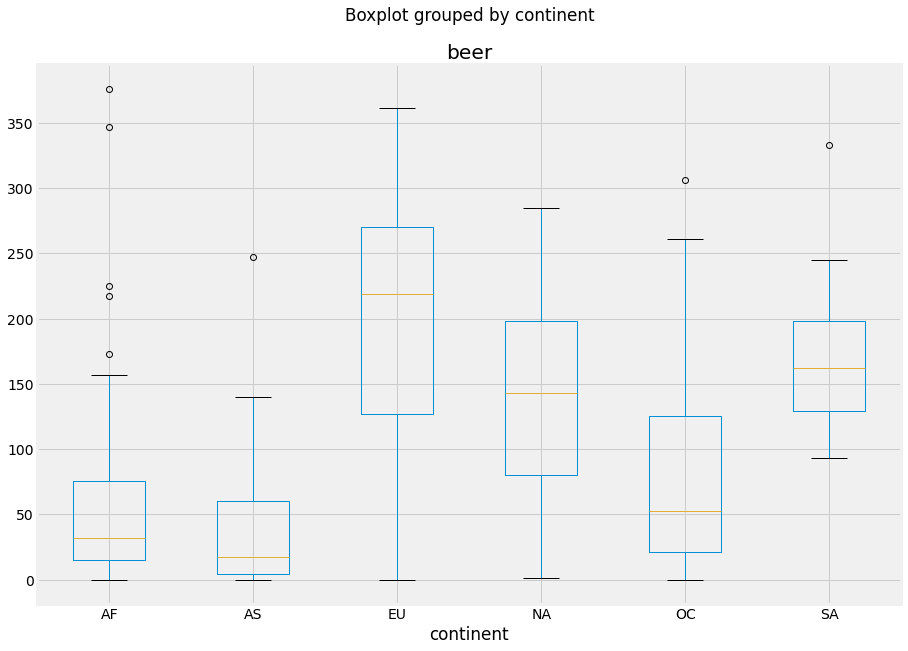

In [50]:
# Box plot of beer servings grouped by continent
drinks.sort_values("beer").boxplot(column='beer', by='continent',figsize=(15,10));

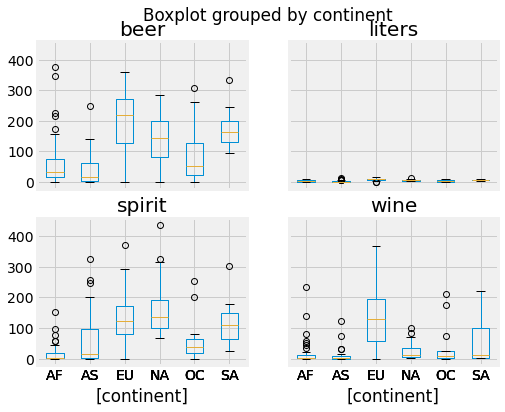

In [51]:
# Box plot of all numeric columns grouped by continent
drinks.boxplot(by='continent');

<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [52]:
# Select the beer and wine columns and sort by beer
beer_wine = drinks[['beer', 'wine']].sort_values('beer')
beer_wine

,beer,wine
0,0,0
40,0,74
79,0,0
90,0,0
97,0,0
...,...,...
135,343,56
65,346,175
62,347,59
45,361,134


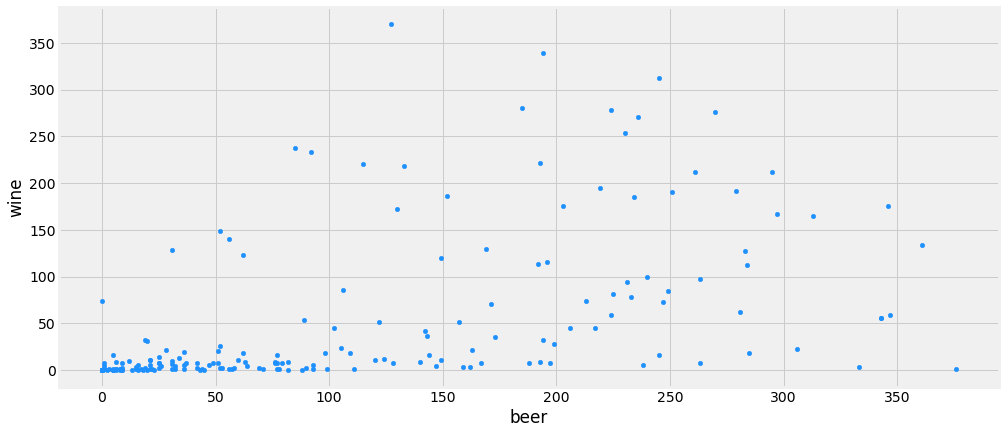

In [53]:
# Compare with scatter plot
beer_wine.plot(x='beer', y='wine', kind='scatter', color='dodgerblue', figsize=(15,7));

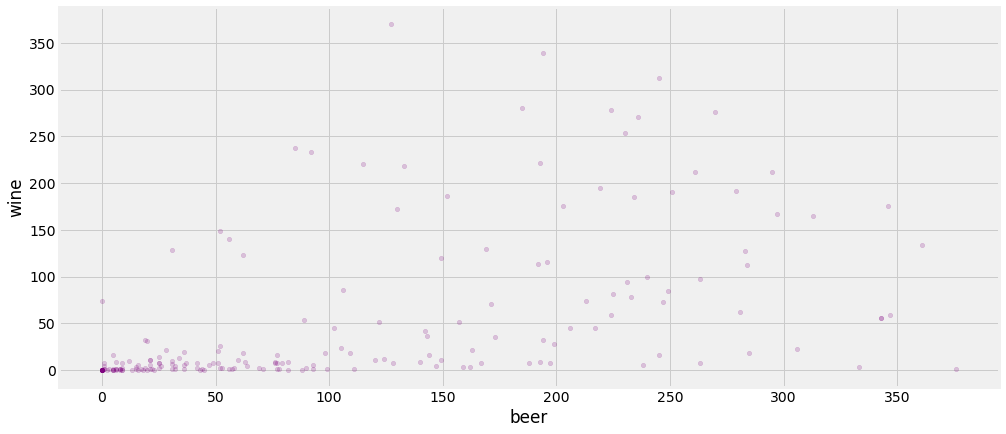

In [55]:
# Add transparency (great when plotting several graphs on top of each other, or for illustrating density!).
beer_wine.plot(x='beer', y='wine', kind='scatter', alpha=0.2, color='purple', figsize=(15,7));

In [ ]:
# The trend indicates that if you drink small servings of beer, you probably don't drink wine at all

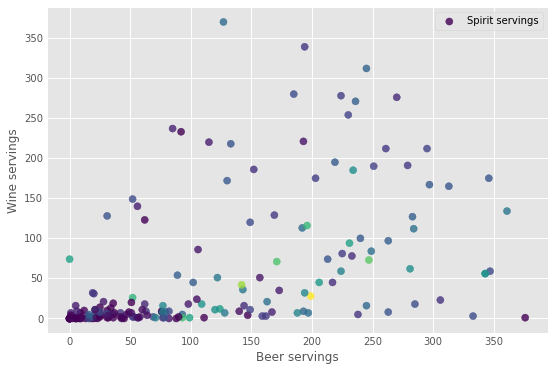

In [99]:
# Vary point color by spirit servings using colour maps
plt.scatter(x=drinks["beer"], y=drinks["wine"], s=50, c=drinks.spirit, cmap='viridis', alpha=0.8, label='Spirit servings')
plt.xlabel("Beer servings")
plt.ylabel("Wine servings")
plt.legend()
plt.show();

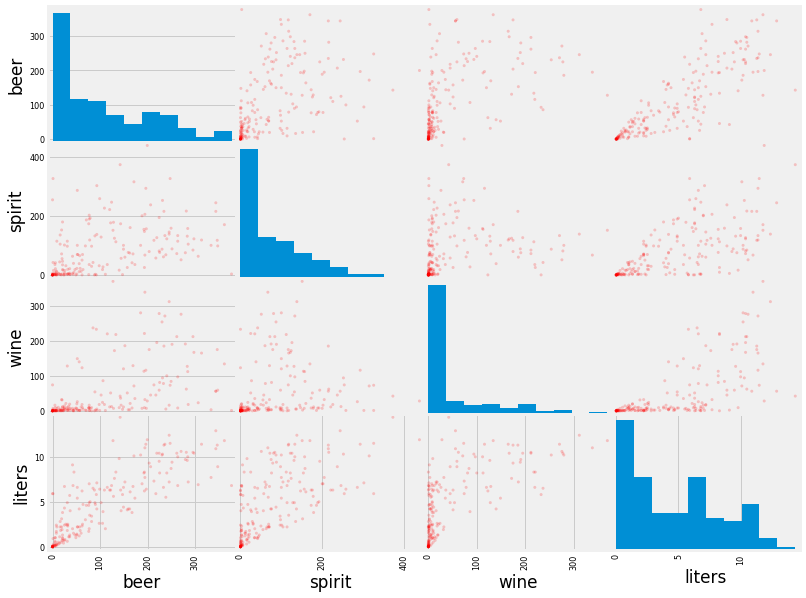

In [71]:
# Scatter matrix of three numerical columns
# Add diagonal='kde' if you want kde instead of histograms
pd.plotting.scatter_matrix(drinks.drop(['continent', 'liters'], axis=1), alpha=0.2, figsize=(12, 10), color='r');

### Plotting `DataFrames`

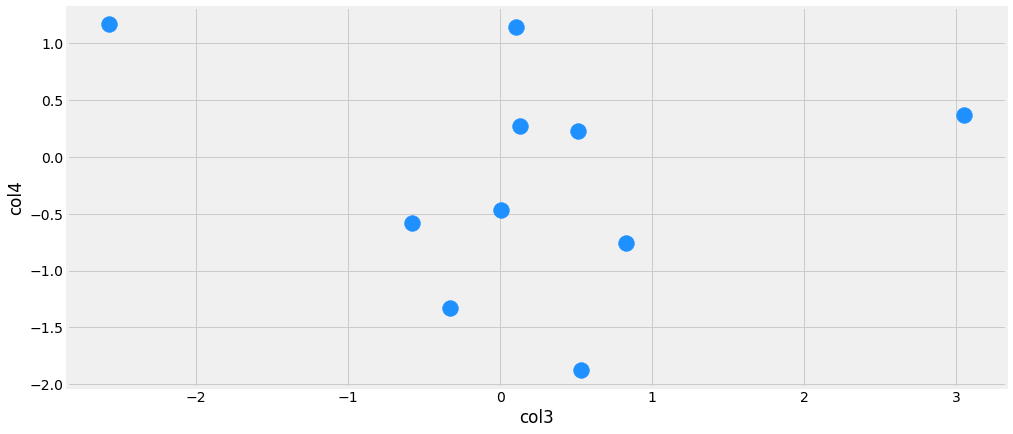

In [67]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue', figsize=(15,7), s=250);

### How to view the association between the variables `ZN` and `INDUS` using a scatter plot

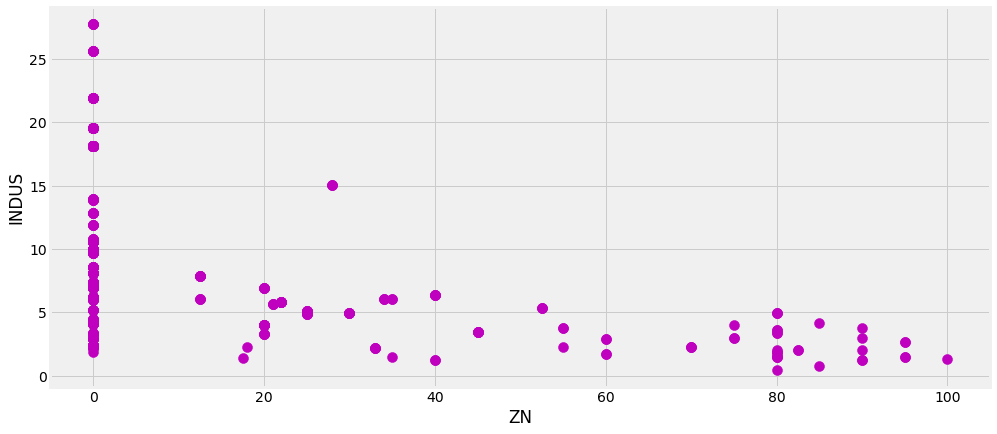

In [69]:
housing.plot(x='ZN', y='INDUS', kind='scatter', color='m', figsize=(15,7), s=100);

### How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

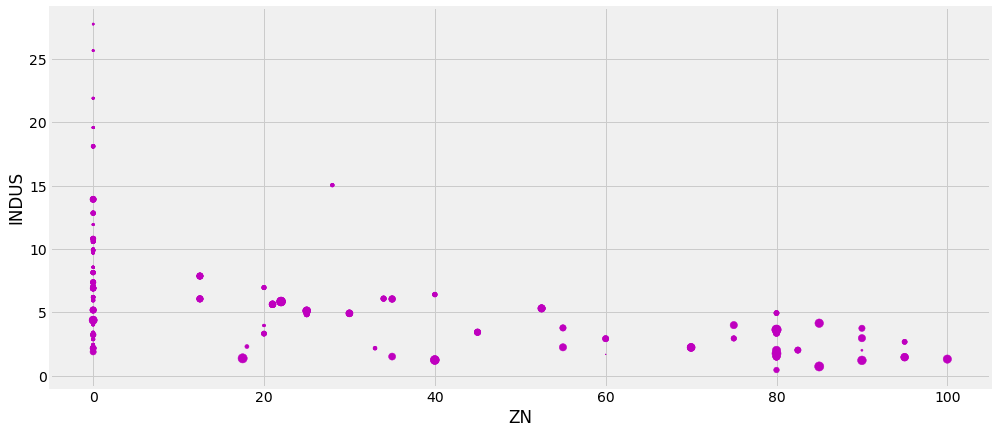

In [70]:
# List comprehension sets the point size ('s') to be the squares of the values in housing['DIS']
housing.plot(x='ZN', y='INDUS', kind='scatter', color='m', figsize=(15,7), s=[x**2 for x in housing['DIS']]);

<a id="seaborn"></a>
## Seaborn `pairplot`

---

- **Objective:** Know when to use Seaborn or advanced Matplotlib.

With the `DataFrame` object `housing`, we will render a pairplot using the Seaborn library.
What do each of the elements represent? Is this more or less useful than the previous plot?

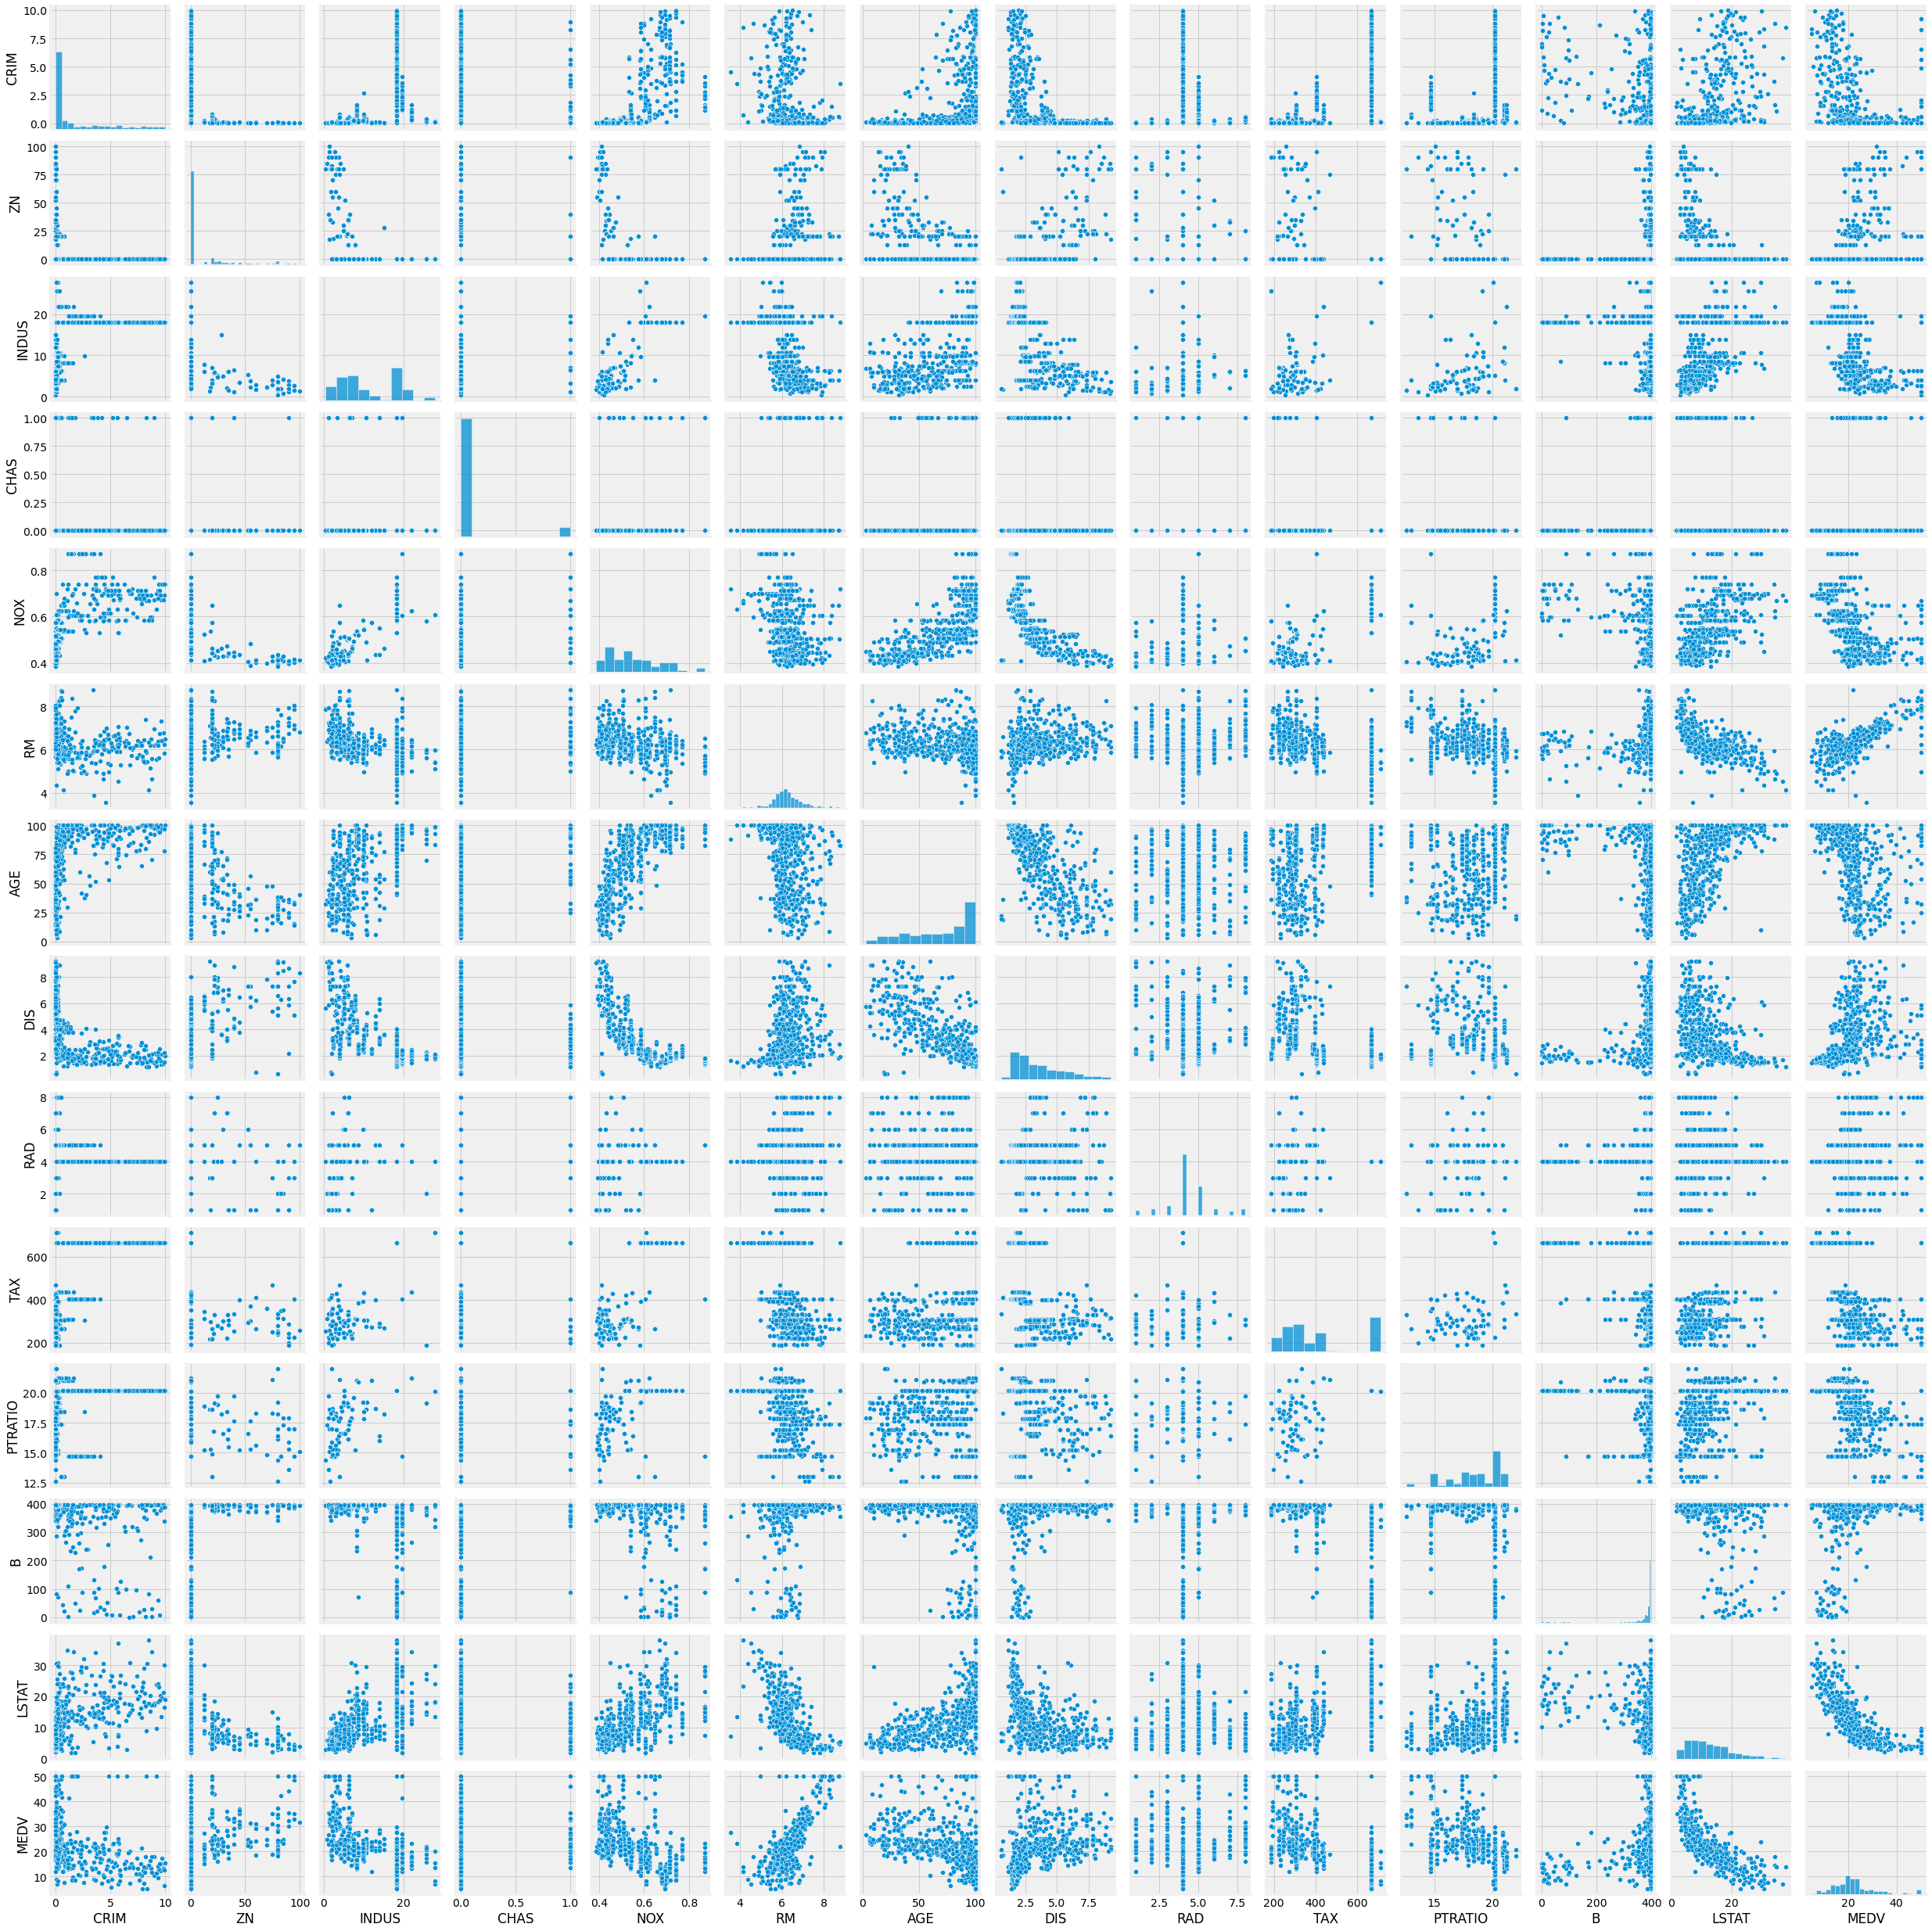

In [80]:
sns.pairplot(housing);

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

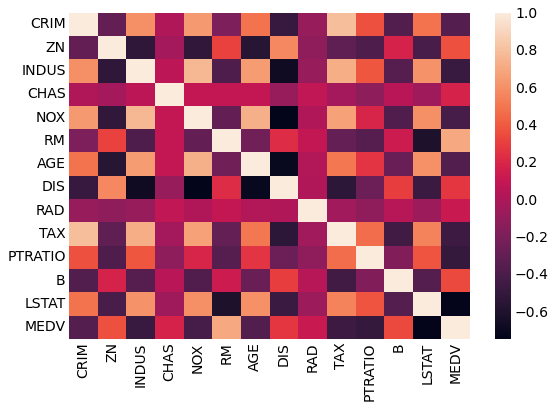

In [81]:
# Make a heatmap on the correlations between variables in the housing data:
housing_correlations = housing.corr();
sns.heatmap(housing_correlations);

### Challenge: Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

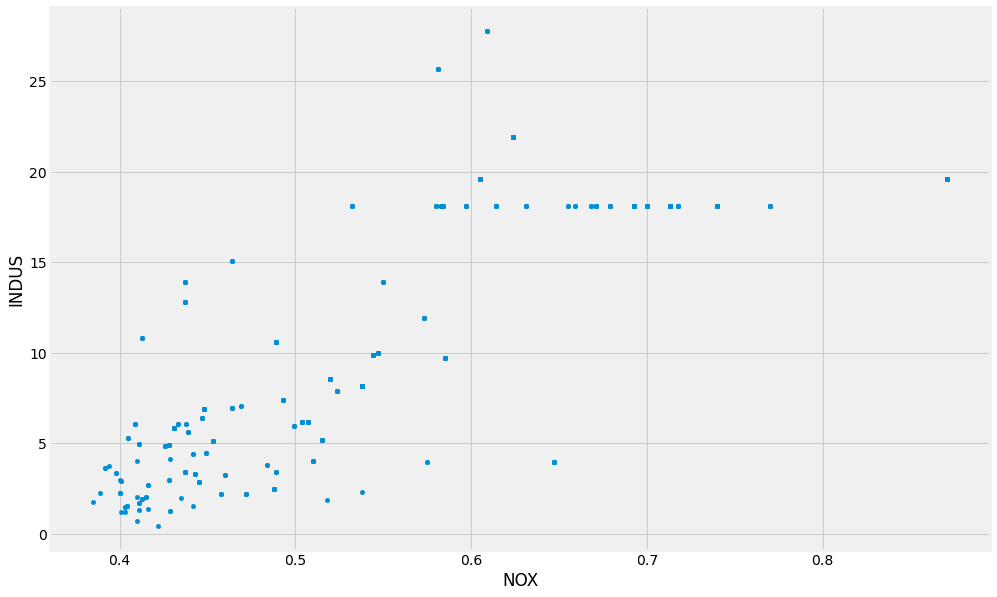

In [82]:
housing.plot(x="NOX", y="INDUS", kind="scatter", figsize=(15,10));

- Now, create a scatter plot of two heatmap entries that appear to have negative correlation.

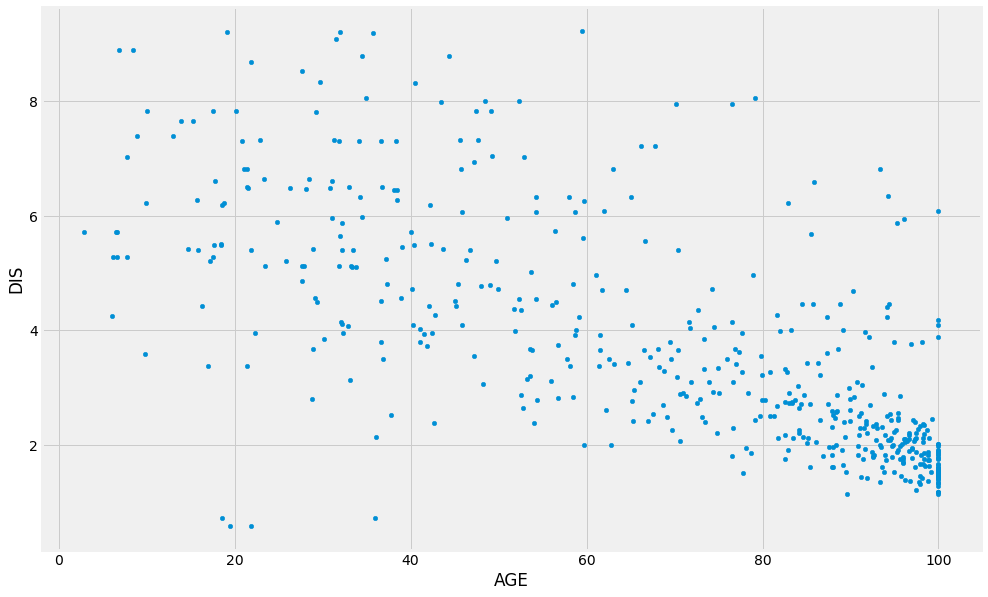

In [83]:
housing.plot(x="AGE", y="DIS", kind="scatter", figsize=(15,10));

<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

Matplotlib uses a blank canvas called a figure.

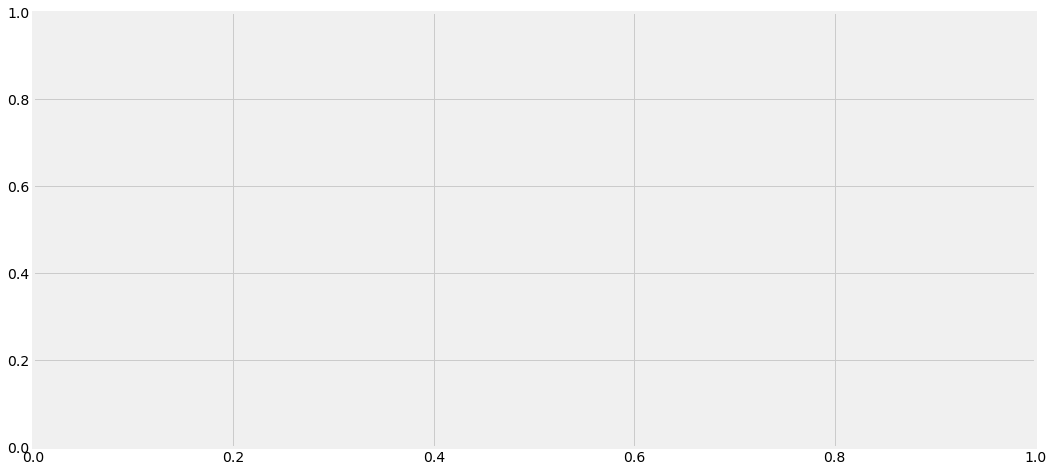

In [84]:
# (nrows=1, ncols=1)
fig = plt.subplots(1, 1, figsize=(16,8));

Within this canvas, we can contain smaller objects called axes.

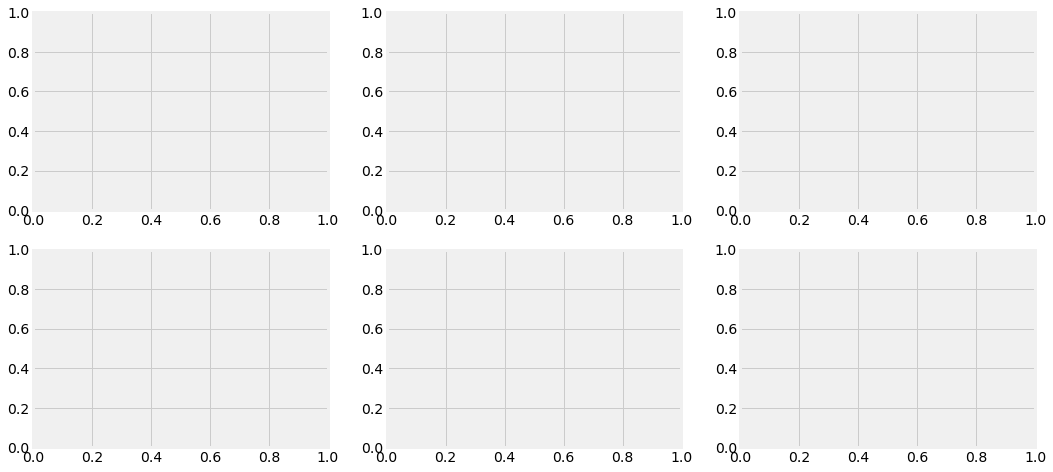

In [85]:
# (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(16,8));

Pandas allows us to plot to a specified axes if we pass the object to the `ax` parameter.

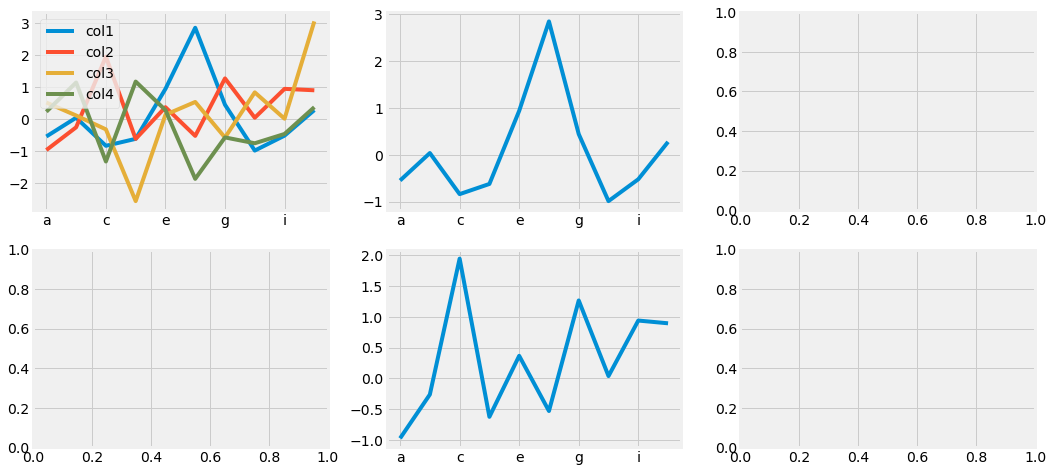

In [86]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))

# Pandas plot all cols in top-left plot
df.plot(ax=axes[0][0]);

# Pandas plot col1 in top 2nd plot
df['col1'].plot(ax=axes[0][1]);

# Pandas plot col2 in bottom 2nd plot
df['col2'].plot(ax=axes[1][1]);

## Let's use a bit more customization.
---

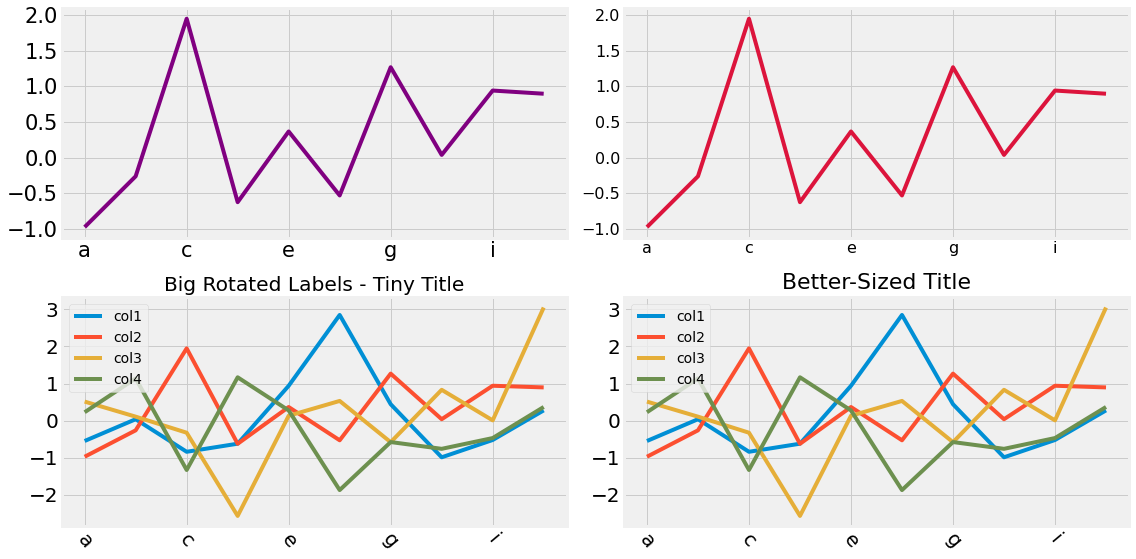

In [90]:
fig, axes = plt.subplots(2, 2, figsize=(16,8))

# We can change the ticks' size using fontsize
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible:
# Show only the even ticks ('idx % 2 == 0' only if 'idx' is even)
ticks_to_show = [idx for idx, _ in enumerate(df['col2'].index) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='crimson', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can add subplot title and change the label rotation using rot
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title', fontsize=20, rot=-50, ax=axes[1][0])

# We have to use "set_title()" on axes to fix title size
df.plot(figsize=(16,8), fontsize=20, rot=-50, ax=axes[1][1]).set_title('Better-Sized Title', fontsize=22, y=1.01)

plt.tight_layout();

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

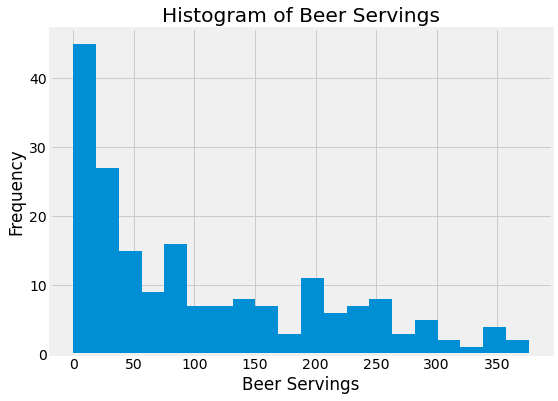

In [91]:
# Saving a plot to file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings');
plt.xlabel('Beer Servings');
plt.ylabel('Frequency');
plt.savefig('beer_histogram.png');    # Save to file in same folder!

In [92]:
# List available plot styles (you are currently using 'fivethirtyeight')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [93]:
# Change to a different style
plt.style.use('ggplot')

<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works